In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

import seaborn as sns

In [2]:
def getROC(fpr,tpr):
    fpr_out = np.arange(0,1,0.01)
    tpr_out = []
    for f in fpr_out:
        
        ind = np.where(fpr <= f)[0][-1]+1

        if ind >= len(fpr):
            ind = len(fpr)-1
            
        tpr_out.append(tpr[ind])
    return fpr_out,tpr_out
def getROC_avg(fpr_list,tpr_list):
    auc_list = []
    t_all = []
    for i in range(len(fpr_list)):
        f,t = getROC(fpr_list[i],tpr_list[i])
        auc_list.append(metrics.auc(fpr_list[i],tpr_list[i]))
        t_all.append(t)
        
    auc_list = np.array(auc_list)
    t_all = np.array(t_all)
        
    return f,t_all.mean(axis = 0),t_all.std(axis = 0),auc_list.mean(),auc_list.std()
    

In [32]:
#sns.set()
#suffix="_extraLayer"
plt.style.use('tableau-colorblind10')
suffix=""
param_baseline = 24
param_rot = 30
param_rotperm = 8

tpr_b2 = []
tpr_rot2 = []
tpr_rotPerm = []

fpr_b2 = []
fpr_rot2 = []
fpr_rotPerm = []

cost_val_list_baseline2 = []
cost_val_list_rot2 = []
cost_val_list_rotPerm = []

for i in np.arange(0,10,1):
    print(i)
    tpr_b2.append(np.load("rotational_dataset"+suffix+"/tpr_b2_{}.npy".format(i)))
    tpr_rot2.append(np.load("rotational_dataset"+suffix+"/tpr_rot2_{}.npy".format(i)))
    tpr_rotPerm.append(np.load("rotational_dataset/tpr_rotPerm_{}.npy".format(i)))
    
    fpr_b2.append(np.load("rotational_dataset"+suffix+"/fpr_b2_{}.npy".format(i)))
    fpr_rot2.append(np.load("rotational_dataset"+suffix+"/fpr_rot2_{}.npy".format(i)))
    fpr_rotPerm.append(np.load("rotational_dataset/fpr_rotPerm_{}.npy".format(i)))

    cost_val_list_baseline2.append(np.load("rotational_dataset"+suffix+"/cost_val_list_baseline2_{}.npy".format(i)))
    cost_val_list_rot2.append(np.load("rotational_dataset"+suffix+"/cost_val_list_rot2_{}.npy".format(i)))
    cost_val_list_rotPerm.append(np.load("rotational_dataset/cost_val_list_rotPerm_{}.npy".format(i)))
    
cost_val_list_baseline2 = np.array(cost_val_list_baseline2)
cost_val_list_rot2 = np.array(cost_val_list_rot2 )
cost_val_list_rotPerm = np.array(cost_val_list_rotPerm) 

0
1
2
3
4
5
6
7
8
9


In [33]:
fpr_b,tpr_b,tpr_b_err,auc_b,auc_b_err=getROC_avg(fpr_b2,tpr_b2)
fpr_rot,tpr_rot,tpr_rot_err,auc_rot,auc_rot_err=getROC_avg(fpr_rot2,tpr_rot2)
fpr_rotPerm,tpr_rotPerm,tpr_rotPerm_err,auc_rotPerm,auc_rotPerm_err=getROC_avg(fpr_rotPerm,tpr_rotPerm)

print("baseline AUC = ", auc_b, "+-",auc_b_err)
print("rot AUC = ", auc_rot, "+-",auc_rot_err)
print("rotPerm AUC = ", auc_rotPerm, "+-",auc_rotPerm_err)

baseline AUC =  0.7200841342739002 +- 0.06028706995204272
rot AUC =  0.8803053036163735 +- 0.06963524583999403
rotPerm AUC =  0.9655112091488588 +- 0.03042780662566564


<Figure size 432x288 with 0 Axes>

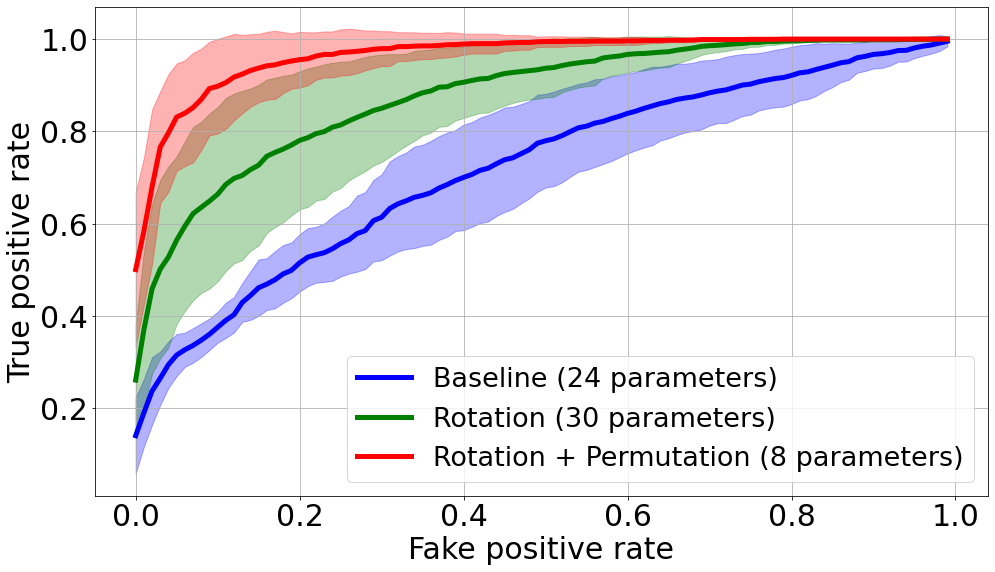

In [34]:

LabelSize=30
plt.figure(1)

plt.figure(figsize=(16,9))
plt.plot(fpr_b,tpr_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(fpr_b, tpr_b-tpr_b_err, tpr_b+tpr_b_err,color='b', alpha=0.3)

plt.plot(fpr_rot,tpr_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(fpr_rot, tpr_rot-tpr_rot_err, tpr_rot+tpr_rot_err,color='green', alpha=0.3)

plt.plot(fpr_rotPerm,tpr_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(fpr_rotPerm, tpr_rotPerm-tpr_rotPerm_err, tpr_rotPerm+tpr_rotPerm_err,color='r', alpha=0.3)

#plt.yscale('log')
plt.xlabel('Fake positive rate',fontsize=LabelSize)
plt.ylabel('True positive rate',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.9)
plt.grid()
plt.savefig("ROC.png",bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

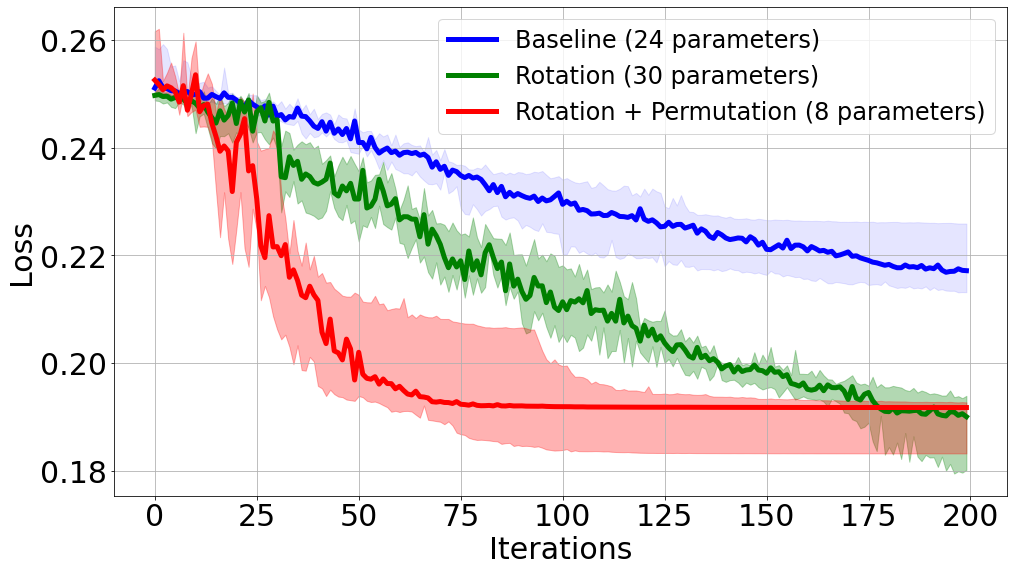

In [35]:
up=0.75
down=0.25
LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

m_b=np.median(cost_val_list_baseline2,axis=0)
std_up=np.quantile(cost_val_list_baseline2, up, axis=0)
std_down=np.quantile(cost_val_list_baseline2, down, axis=0)
plt.plot(range(len(m_b)),m_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(range(len(m_b)), std_down, std_up,color='b', alpha=0.1)


m_rot=np.median(cost_val_list_rot2,axis=0)
std_up=np.quantile(cost_val_list_rot2, up, axis=0)
std_down=np.quantile(cost_val_list_rot2, down, axis=0)
plt.plot(range(len(m_rot)), m_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(range(len(m_rot)), std_down, std_up,color='green', alpha=0.3)



m_rotPerm=np.median(cost_val_list_rotPerm,axis=0)
std_up=np.quantile(cost_val_list_rotPerm, up, axis=0)
std_down=np.quantile(cost_val_list_rotPerm, down, axis=0)
plt.plot(range(len(m_rotPerm)), m_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(range(len(m_rotPerm)), std_down, std_up,color='r', alpha=0.3)



plt.xlabel('Iterations',fontsize=LabelSize)
plt.ylabel('Loss',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.8)
plt.grid()
plt.savefig("loss.png",bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

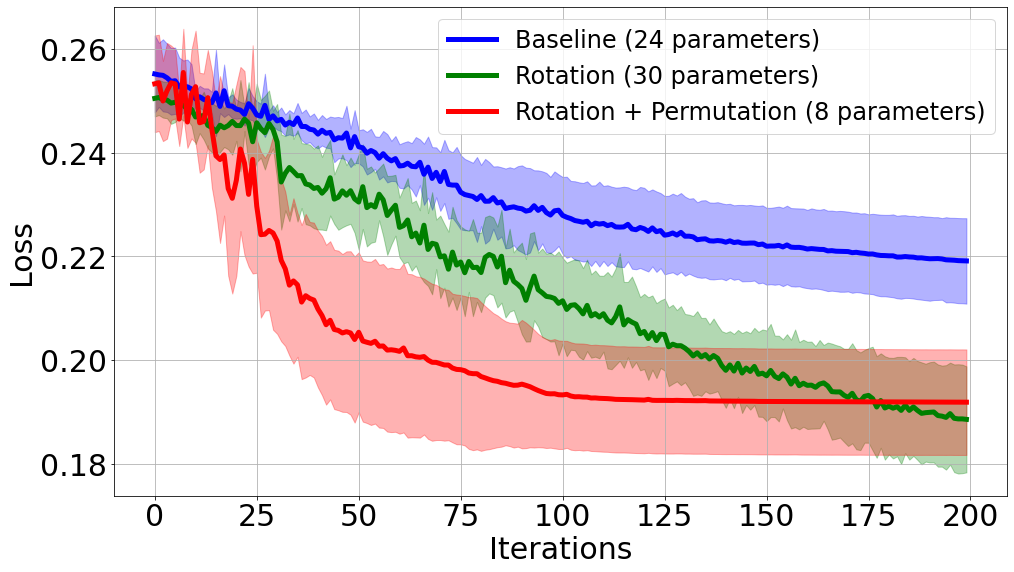

In [36]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))
m_b=cost_val_list_baseline2.mean(axis=0)
std_b=cost_val_list_baseline2.std(axis=0)
plt.plot(range(len(m_b)),m_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(range(len(m_b)), m_b-std_b, m_b+std_b,color='b', alpha=0.3)

m_rot=cost_val_list_rot2.mean(axis=0)
#m_rot=np.median(cost_val_list_rot2,axis=0)
std_rot=cost_val_list_rot2.std(axis=0)
plt.plot(range(len(m_rot)), m_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(range(len(m_rot)), m_rot-std_rot, m_rot+std_rot,color='green', alpha=0.3)


m_rotPerm=cost_val_list_rotPerm.mean(axis=0)
std_rotPerm=cost_val_list_rotPerm.std(axis=0)
plt.plot(range(len(m_rotPerm)), m_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(range(len(m_rotPerm)), m_rotPerm-std_rotPerm, m_rotPerm+std_rotPerm,color='r', alpha=0.3)
#plt.yscale('log')
#plt.ylim(800,1400)
plt.xlabel('Iterations',fontsize=LabelSize)
plt.ylabel('Loss',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.8)
plt.grid()
plt.savefig("loss_meanSTD.png",bbox_inches='tight')

${\Large \text{Lorentz plotting}}$

In [4]:
#2 is a bit buggy...

maxEvents=1000 

param_baseline = 48
param_rot = 18
param_rotperm = 4

tpr_b2 = []
tpr_rot2 = []
tpr_rotPerm = []

fpr_b2 = []
fpr_rot2 = []
fpr_rotPerm = []

cost_val_list_baseline2 = []
cost_val_list_rot2 = []
cost_val_list_rotPerm = []

tpr_mass = []
fpr_mass = []


for i in np.arange(0,10,1):
#     if i in [1]:
#         continue
    print(i)

        
    tpr_b2.append(np.load("Lorentz_dataset/tpr_baseline_{}.npy".format(i)))
    tpr_rot2.append(np.load("Lorentz_dataset/tpr_rot_{}.npy".format(i)))
    tpr_rotPerm.append(np.load("Lorentz_dataset/tpr_rotPerm_{}.npy".format(i)))
    tpr_mass.append(np.load("Lorentz_dataset/tpr_maxx_{}.npy".format(i)))
    
    fpr_b2.append(np.load("Lorentz_dataset/fpr_baseline_{}.npy".format(i)))
    fpr_rot2.append(np.load("Lorentz_dataset/fpr_rot_{}.npy".format(i)))
    fpr_rotPerm.append(np.load("Lorentz_dataset/fpr_rotPerm_{}.npy".format(i)))
    fpr_mass.append(np.load("Lorentz_dataset/fpr_maxx_{}.npy".format(i)))

    cost_val_list_baseline2.append(np.load("Lorentz_dataset/cost_val_list_baseline_{}.npy".format(i)))
    cost_val_list_rot2.append(np.load("Lorentz_dataset/cost_val_list_rot_{}.npy".format(i)))
    cost_val_list_rotPerm.append(np.load("Lorentz_dataset/cost_val_list_rotPerm_{}.npy".format(i)))

maxIter=60

cost_val_list_baseline2 = np.array(cost_val_list_baseline2)[0:maxIter]/(4*maxEvents)
cost_val_list_rot2 = np.array(cost_val_list_rot2 )[0:maxIter]/(4*maxEvents)
cost_val_list_rotPerm = np.array(cost_val_list_rotPerm)[0:maxIter]/(4*maxEvents)

fpr_mass=np.array(fpr_mass)
tpr_mass=np.array(tpr_mass)

0
1
2
3
4
5
6
7
8
9


In [5]:
fpr_b,tpr_b,tpr_b_err,auc_b,auc_b_err=getROC_avg(fpr_b2,tpr_b2)
fpr_rot,tpr_rot,tpr_rot_err,auc_rot,auc_rot_err=getROC_avg(fpr_rot2,tpr_rot2)
fpr_rotPerm,tpr_rotPerm,tpr_rotPerm_err,auc_rotPerm,auc_rotPerm_err=getROC_avg(fpr_rotPerm,tpr_rotPerm)

auc_mass = []
for i in range(len(fpr_mass)):
    auc_mass.append(metrics.auc(fpr_mass[i],tpr_mass[i]))
auc_mass=np.array(auc_mass)

print("baseline AUC = ", auc_b, "+-",auc_b_err)
print("rot AUC = ", auc_rot, "+-",auc_rot_err)
print("rotPerm AUC = ", auc_rotPerm, "+-",auc_rotPerm_err)
print("mass cut AUC = ", auc_mass.mean(), "+-", auc_mass.std())

fpr_mass=fpr_mass.mean(axis=0)
tpr_mass_std=tpr_mass.std(axis=0)
tpr_mass=tpr_mass.mean(axis=0)

baseline AUC =  0.5437015875572222 +- 0.06072823947686958
rot AUC =  0.8130632346417246 +- 0.07593669557746556
rotPerm AUC =  0.9822347692883024 +- 0.011968283057710772
mass cut AUC =  0.9875956997367912 +- 0.0014079169383336843


In [6]:
len(cost_val_list_baseline2[0])

60

<Figure size 432x288 with 0 Axes>

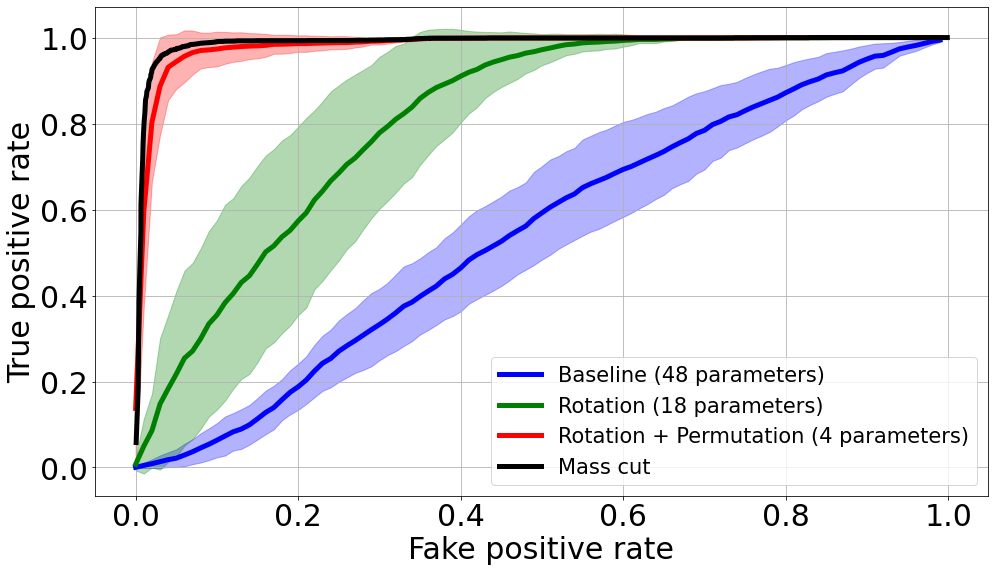

In [7]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))


plt.plot(fpr_b,tpr_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(fpr_b, tpr_b-tpr_b_err, tpr_b+tpr_b_err,color='b', alpha=0.3)

plt.plot(fpr_rot,tpr_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(fpr_rot, tpr_rot-tpr_rot_err, tpr_rot+tpr_rot_err,color='green', alpha=0.3)

plt.plot(fpr_rotPerm,tpr_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(fpr_rotPerm, tpr_rotPerm-tpr_rotPerm_err, tpr_rotPerm+tpr_rotPerm_err,color='r', alpha=0.3)


plt.plot(fpr_mass,tpr_mass,color='black',linewidth=5,label="Mass cut")
plt.fill_between(fpr_mass, tpr_mass-tpr_mass_std, tpr_mass+tpr_mass_std,color='black', alpha=0.3)

#plt.yscale('log')
plt.xlabel('Fake positive rate',fontsize=LabelSize)
plt.ylabel('True positive rate',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.7)
plt.grid()
plt.savefig("ROC_decay.png",bbox_inches='tight')

/var/folders/9v/dz00k5396wl369lhxwggy12m0000gn/T/ipykernel_28305/1585967519.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,20)


<Figure size 432x288 with 0 Axes>

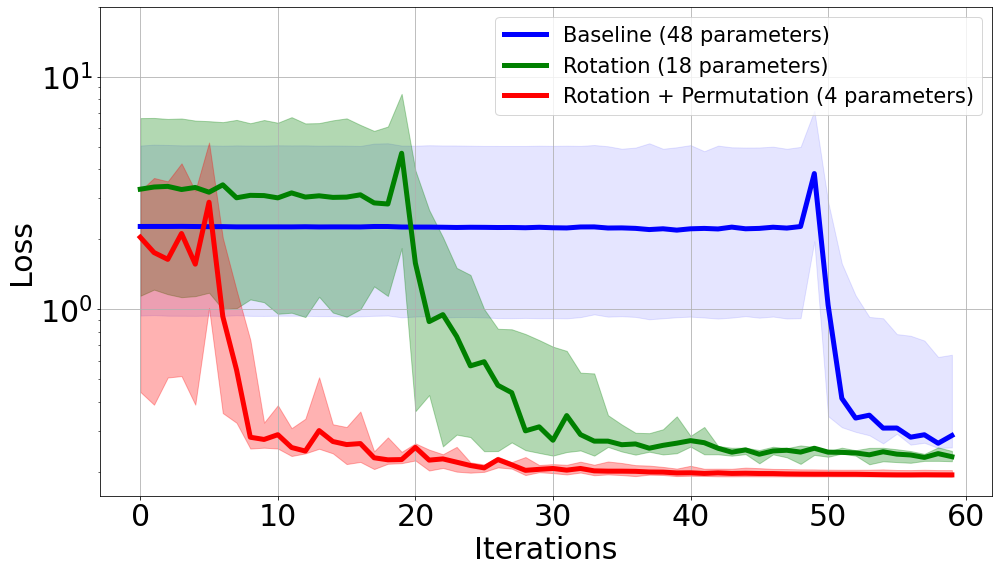

In [8]:
up=0.75
down=0.25
LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

m_b=np.median(cost_val_list_baseline2,axis=0)
std_up=np.quantile(cost_val_list_baseline2, up, axis=0)
std_down=np.quantile(cost_val_list_baseline2, down, axis=0)
plt.plot(range(len(m_b)),m_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(range(len(m_b)), std_down, std_up,color='b', alpha=0.1)


m_rot=np.median(cost_val_list_rot2,axis=0)
std_up=np.quantile(cost_val_list_rot2, up, axis=0)
std_down=np.quantile(cost_val_list_rot2, down, axis=0)
plt.plot(range(len(m_rot)), m_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(range(len(m_rot)), std_down, std_up,color='green', alpha=0.3)



m_rotPerm=np.median(cost_val_list_rotPerm,axis=0)
std_up=np.quantile(cost_val_list_rotPerm, up, axis=0)
std_down=np.quantile(cost_val_list_rotPerm, down, axis=0)
plt.plot(range(len(m_rotPerm)), m_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(range(len(m_rotPerm)), std_down, std_up,color='r', alpha=0.3)


# m_b=cost_val_list_baseline2.mean(axis=0)
# std_b=cost_val_list_baseline2.std(axis=0)
# plt.plot(range(len(m_b)),m_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
# plt.fill_between(range(len(m_b)), m_b-std_b, m_b+std_b,color='b', alpha=0.1)

# m_rot=cost_val_list_rot2.mean(axis=0)
# std_rot=cost_val_list_rot2.std(axis=0)
# plt.plot(range(len(m_rot)), m_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
# plt.fill_between(range(len(m_rot)), m_rot-std_rot, m_rot+std_rot,color='green', alpha=0.3)


# m_rotPerm=cost_val_list_rotPerm.mean(axis=0)
# std_rotPerm=cost_val_list_rotPerm.std(axis=0)
# plt.plot(range(len(m_rotPerm)), m_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
# plt.fill_between(range(len(m_rotPerm)), m_rotPerm-std_rotPerm, m_rotPerm+std_rotPerm,color='r', alpha=0.3)
plt.yscale('log')
plt.ylim(0,20)
plt.xlabel('Iterations',fontsize=LabelSize)
plt.ylabel('Loss',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.7)
plt.grid()
plt.savefig("Loss_decay.png",bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

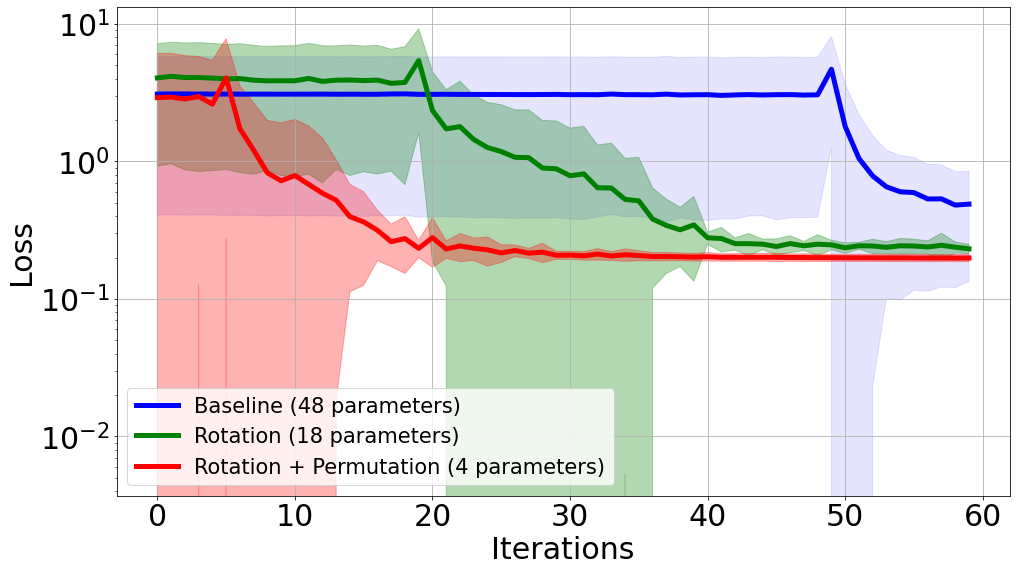

In [9]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))


m_b=cost_val_list_baseline2.mean(axis=0)
std_b=cost_val_list_baseline2.std(axis=0)
plt.plot(range(len(m_b)),m_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(range(len(m_b)), m_b-std_b, m_b+std_b,color='b', alpha=0.1)

m_rot=cost_val_list_rot2.mean(axis=0)
std_rot=cost_val_list_rot2.std(axis=0)
plt.plot(range(len(m_rot)), m_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(range(len(m_rot)), m_rot-std_rot, m_rot+std_rot,color='green', alpha=0.3)


m_rotPerm=cost_val_list_rotPerm.mean(axis=0)
std_rotPerm=cost_val_list_rotPerm.std(axis=0)
plt.plot(range(len(m_rotPerm)), m_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(range(len(m_rotPerm)), m_rotPerm-std_rotPerm, m_rotPerm+std_rotPerm,color='r', alpha=0.3)
plt.yscale('log')
#plt.ylim(800,1400)
plt.xlabel('Iterations',fontsize=LabelSize)
plt.ylabel('Loss',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.7)
plt.grid()
plt.savefig("Loss_decay_meanSTD.png",bbox_inches='tight')

In [9]:
#sns.set()

suffix="_extraLayer"
suffix_2="extra_layer_"
plt.style.use('tableau-colorblind10')
param_baseline = 40
param_rot = 50
param_rotperm = 8

tpr_b2 = []
tpr_rot2 = []
tpr_rotPerm = []

fpr_b2 = []
fpr_rot2 = []
fpr_rotPerm = []

cost_val_list_baseline2 = []
cost_val_list_rot2 = []
cost_val_list_rotPerm = []

for i in np.arange(0,10,1):
    print(i)
    tpr_b2.append(np.load("rotational_dataset"+suffix+"/tpr_b2_"+suffix_2+"{}.npy".format(i)))
    tpr_rot2.append(np.load("rotational_dataset"+suffix+"/tpr_rot2_"+suffix_2+"{}.npy".format(i)))
    tpr_rotPerm.append(np.load("rotational_dataset/tpr_rotPerm_{}.npy".format(i)))
    
    fpr_b2.append(np.load("rotational_dataset"+suffix+"/fpr_b2_"+suffix_2+"{}.npy".format(i)))
    fpr_rot2.append(np.load("rotational_dataset"+suffix+"/fpr_rot2_"+suffix_2+"{}.npy".format(i)))
    fpr_rotPerm.append(np.load("rotational_dataset/fpr_rotPerm_{}.npy".format(i)))

    cost_val_list_baseline2.append(np.load("rotational_dataset"+suffix+"/cost_val_list_baseline2_"+suffix_2+"{}.npy".format(i)))
    cost_val_list_rot2.append(np.load("rotational_dataset"+suffix+"/cost_val_list_rot2_"+suffix_2+"{}.npy".format(i)))
    cost_val_list_rotPerm.append(np.load("rotational_dataset/cost_val_list_rotPerm_{}.npy".format(i)))
    
cost_val_list_baseline2 = np.array(cost_val_list_baseline2)
cost_val_list_rot2 = np.array(cost_val_list_rot2 )
cost_val_list_rotPerm = np.array(cost_val_list_rotPerm) 

0
1
2
3
4
5
6
7
8
9


In [10]:
fpr_b,tpr_b,tpr_b_err,auc_b,auc_b_err=getROC_avg(fpr_b2,tpr_b2)
fpr_rot,tpr_rot,tpr_rot_err,auc_rot,auc_rot_err=getROC_avg(fpr_rot2,tpr_rot2)
fpr_rotPerm,tpr_rotPerm,tpr_rotPerm_err,auc_rotPerm,auc_rotPerm_err=getROC_avg(fpr_rotPerm,tpr_rotPerm)

print("baseline AUC = ", auc_b, "+-",auc_b_err)
print("rot AUC = ", auc_rot, "+-",auc_rot_err)
print("rotPerm AUC = ", auc_rotPerm, "+-",auc_rotPerm_err)


baseline AUC =  0.7716401959107935 +- 0.032974721679269785
rot AUC =  0.9011632501692523 +- 0.03917390401572948
rotPerm AUC =  0.9655112091488588 +- 0.03042780662566564


<Figure size 432x288 with 0 Axes>

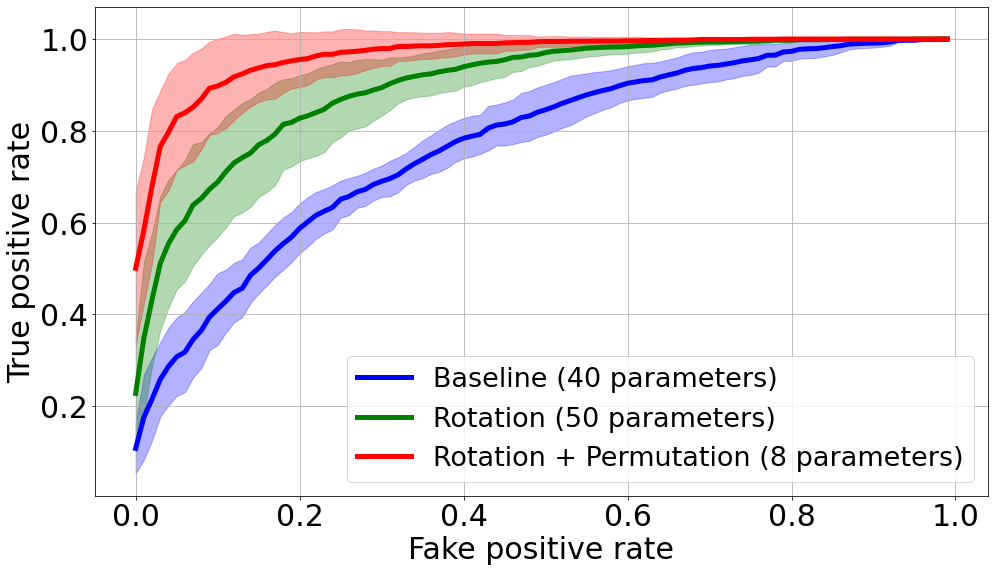

In [11]:
LabelSize=30
plt.figure(1)

plt.figure(figsize=(16,9))
plt.plot(fpr_b,tpr_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(fpr_b, tpr_b-tpr_b_err, tpr_b+tpr_b_err,color='b', alpha=0.3)

plt.plot(fpr_rot,tpr_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(fpr_rot, tpr_rot-tpr_rot_err, tpr_rot+tpr_rot_err,color='green', alpha=0.3)

plt.plot(fpr_rotPerm,tpr_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(fpr_rotPerm, tpr_rotPerm-tpr_rotPerm_err, tpr_rotPerm+tpr_rotPerm_err,color='r', alpha=0.3)

#plt.yscale('log')
plt.xlabel('Fake positive rate',fontsize=LabelSize)
plt.ylabel('True positive rate',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.9)
plt.grid()
plt.savefig("ROC"+suffix+".png",bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

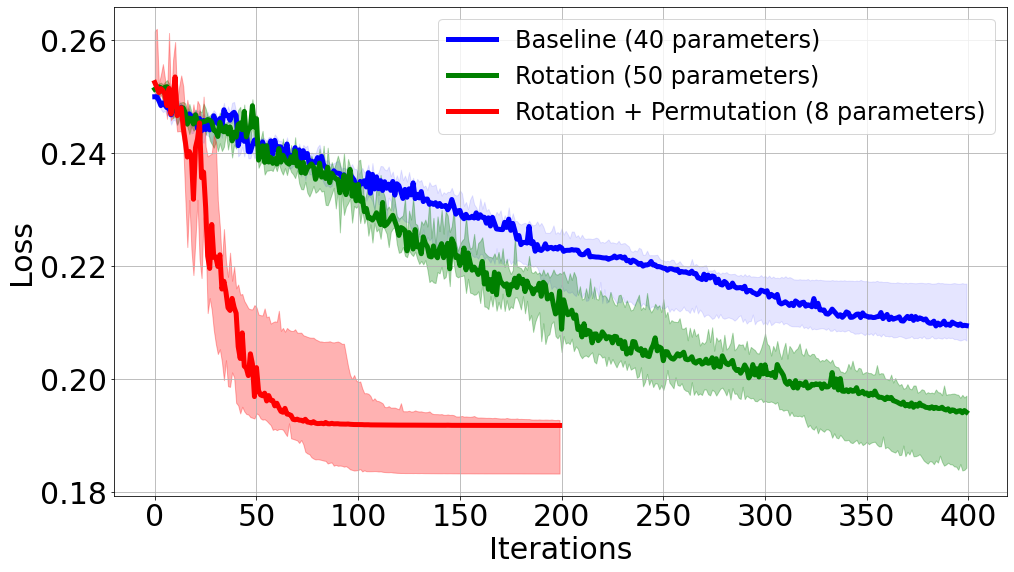

In [12]:
up=0.75
down=0.25
LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

m_b=np.median(cost_val_list_baseline2,axis=0)
std_up=np.quantile(cost_val_list_baseline2, up, axis=0)
std_down=np.quantile(cost_val_list_baseline2, down, axis=0)
plt.plot(range(len(m_b)),m_b,color='b',linewidth=5,label="Baseline ({} parameters)".format(param_baseline))
plt.fill_between(range(len(m_b)), std_down, std_up,color='b', alpha=0.1)


m_rot=np.median(cost_val_list_rot2,axis=0)
std_up=np.quantile(cost_val_list_rot2, up, axis=0)
std_down=np.quantile(cost_val_list_rot2, down, axis=0)
plt.plot(range(len(m_rot)), m_rot,color='green',linewidth=5,label="Rotation ({} parameters)".format(param_rot))
plt.fill_between(range(len(m_rot)), std_down, std_up,color='green', alpha=0.3)



m_rotPerm=np.median(cost_val_list_rotPerm,axis=0)
std_up=np.quantile(cost_val_list_rotPerm, up, axis=0)
std_down=np.quantile(cost_val_list_rotPerm, down, axis=0)
plt.plot(range(len(m_rotPerm)), m_rotPerm,color='r',linewidth=5,label="Rotation + Permutation ({} parameters)".format(param_rotperm))
plt.fill_between(range(len(m_rotPerm)), std_down, std_up,color='r', alpha=0.3)



plt.xlabel('Iterations',fontsize=LabelSize)
plt.ylabel('Loss',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize*0.8)
plt.grid()
plt.savefig("loss"+suffix+".png",bbox_inches='tight')